# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [104]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [105]:
# load data
titanic = pd.read_csv('train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [106]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [107]:
# TODO: Find missing data using .isna() function and then use .sum() function to show the summary of missing value of each column
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [108]:
# TODO: Impute missing values

# Impute the missing value of 'Age' with the mean
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Impute the missing value of 'Cabin' with a constant value 'Other'
titanic['Cabin'] = titanic['Cabin'].fillna('Other')

# Impute the missing value of 'Embark' with the mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [109]:
# TODO: Find the passenger with the 16th most expansive ticket

pax = titanic.loc[:, ['Name','Fare']].sort_values('Fare', ascending=False)
pax.iloc[15, :]


Name    Farthing, Mr. John
Fare              221.7792
Name: 527, dtype: object

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [110]:
# TODO: Filter out the survived passenger with 6th most expansive ticket

survivor = titanic.loc[titanic['Survived']==1, ['Name','Survived','Fare']].sort_values('Fare', ascending=False)
survivor.iloc[5, : ]

Name        Ryerson, Miss. Emily Borie
Survived                             1
Fare                           262.375
Name: 311, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

### **Answer to Question 5**
**My findings:** Compared to male passengers, female passengers has higher survival rate. 
Within the three classes of the ticket - class 1, 2 and 3, passengers with class 1 tickets have higest survival rate, and class 3 ticket holders have the lowest survival rate.

In [111]:
# TODO: Calculate the survival rate using pivot table aggregates by taking the mean across Sex and Pclass columns

table = pd.pivot_table(titanic, index=['Sex','Pclass'], values=['Survived'], aggfunc= np.mean)
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

### **Answer to Question 6**
**My findings**: Based on the visualization, passengers between age 28 to 32 are the largest population on board, for both survived and non-survived group.

Within the age group of 28 ~ 32, there were more passengers died in the shipwreck than the ones who survived.

On the other hand, within the age group of 0 ~ 4, there were more passengers who survived than the ones who did not. 

<ipython-input-112-79fca1ae5167>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No')
<ipython-input-112-79fca1ae5167>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], colo

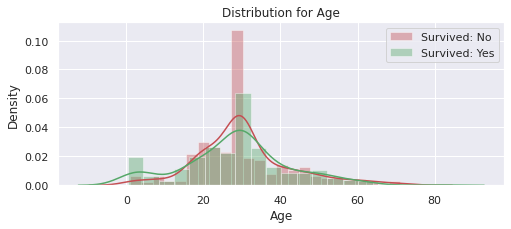

In [112]:
# TODO: Visualize the distribution of Age for both survived and non-survived population

# apply the default theme
sns.set_theme()

# Seaborn displot lets you show a histogram with a line on it
def distplot(feature, frame):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()

numerical_cols = ['Age']  

# show the statistics of column Age and use distplot to plot the Distribution of Age for Survived and Non-Survived passengers.
# display(titanic['Age'].describe())
distplot('Age', titanic)

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

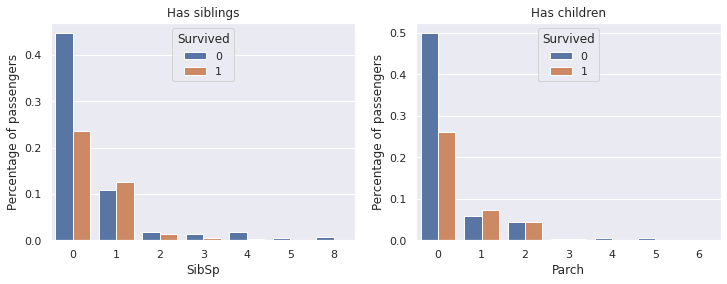

In [113]:
# TODO: Calculate the survival rate for column SibSp and Parch

fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has siblings")
axis[1].set_title("Has children")
axis_y = "Percentage of passengers"
# Plot SibSp column
gp_sibling = titanic.groupby('SibSp')["Survived"].value_counts()/len(titanic)
gp_sibling = gp_sibling.to_frame().rename({"Survived": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SibSp', y= axis_y, hue='Survived', data=gp_sibling, ax=axis[0])
# Plot Parch column
gp_child = titanic.groupby('Parch')["Survived"].value_counts()/len(titanic)
gp_child = gp_child.to_frame().rename({"Survived": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Parch', y= axis_y, hue='Survived', data=gp_child, ax=axis[1])

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

### **Answer to Question 8**
**My findings**: The feature Sex has the strongest positive correlation with our target variable Survived, with the correlation coefficient value of 0.54. At the same time, there are a few variables, such as Ticket and Name, that have no correlation with Survived and whose correlation value is near 0.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Survived,-0.005007,1.000000,0.247845,-0.005007,0.543351,0.037025,-0.136302,0.086210,-0.047298,0.191981,0.270495,0.106811
Pclass,0.018305,0.247845,1.000000,0.018305,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091
Name,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.123648,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030467
Sex,-0.042939,0.543351,0.118133,-0.042939,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569
Age,0.123648,0.037025,0.171190,0.123648,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308
SibSp,-0.031023,-0.136302,-0.149630,-0.031023,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683
Parch,0.001206,0.086210,-0.000343,0.001206,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059
Ticket,0.760875,-0.047298,0.020431,0.760875,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655
Fare,0.299982,0.191981,0.079498,0.299982,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726


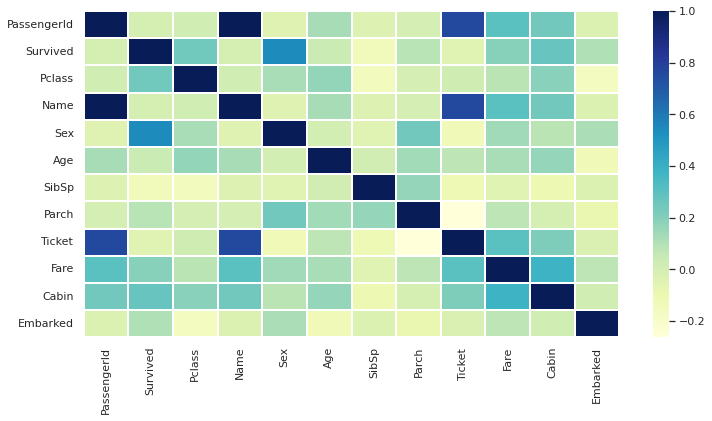

In [114]:
# TODO: Generate heatmap to show the correlations between each attribute and target variable Survived

plt.figure(figsize=(12, 6))
corr = titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()

display(corr)

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths= .2, cmap="YlGnBu")

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

### **Answer to Question 9**
**My findings**: Based on the scatter plot generated below, most passengers who survived paid less than 100 for the fare. And I have also noticed there are some passengers who paid 0 for their tickets. 

I am interested to learn who these passengers who paid 0 for their tickets are. I found some shared features between these 15 passengers with free tickets: male, embarked from Southampton, has no siblings nor children, and all but one of them survived. The resemblance these 15 passengers shared with the character "Jack" from the movie Titanic, who won his ticket to board "the ship of dreams" for her maiden voyage from Southhampton to New York City in a poker game, is uncanny. And most of them shared the same fate of not surviving the shipwreck.  

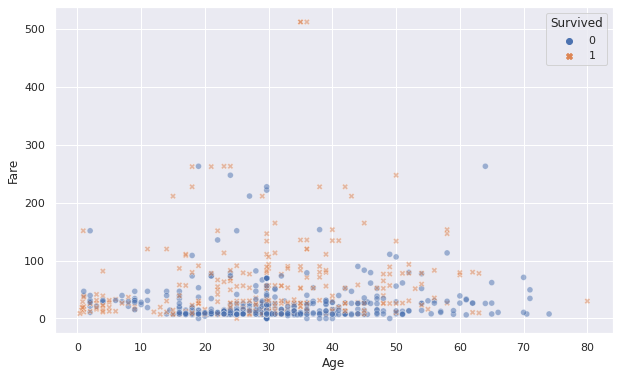

In [115]:
# TODO: Generate scatter plot to show the distribution of passengers based on both Fare and Age

fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Survived', alpha=0.5, data=titanic)

In [116]:
free = titanic['Fare']==0
titanic[free]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,Other,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,Other,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,Other,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,Other,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,Other,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,Other,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,Other,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,Other,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,Other,S


### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [151]:
# TODO: Bulid logistic regression model

# logistic regression
from sklearn.linear_model import LogisticRegression

# convert categorical attributes from string to float
titanic['Sex'] = titanic['Sex'].replace("male", 1). replace("female", 0)

selected_index = ['Pclass', 'Sex', 'Age', 'Fare']
# load training data
X_train = titanic[selected_index]
y_train = titanic['Survived']

# model_initialization
logistic_regression_model = LogisticRegression()

# model fit
logistic_regression_model.fit(X_train, y_train)

# print model parameters
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))


Slope: [[-1.11288021e+00 -2.51264538e+00 -3.25964434e-02  8.04904769e-04]]
Intercept: [4.49924891]


In [152]:
#  use the RL model and make predictions on the training data
train_z = logistic_regression_model.predict(X_train)

# evaluate LR model with training data
from sklearn.metrics import accuracy_score

print("model accuracy on train set: {}".format(accuracy_score(y_train, train_z)))

model accuracy on train set: 0.8002244668911336


In [173]:
# load test data
test = pd.read_csv('test.csv')

# any missing value?
test.isna().sum()

# drop the rows with missing values
#test.dropna(inplace=True)

# replace NA in Age with average age 30
test['Age'] = test['Age'].fillna(test['Age'].mean())

# replace NA in Fare with Mean 35.627188
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [175]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [176]:
# convert categorical attributes from string to float
test['Sex'] = test['Sex'].replace("male", 1). replace("female", 0)

test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [179]:
#  use the RL model and make predictions on the test data
selected_index = ['Pclass', 'Sex', 'Age','Fare']
X_test = test[selected_index]

test_z = logistic_regression_model.predict(X_test)
#len(test_z)
id = np.array(test['PassengerId'])

submission = pd.DataFrame({'PassengerId':id,'Survived':test_z})
submission.to_csv('submission.csv', index=False, header=True)